In [7]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.keys import Keys as KEY
import pandas as pd
import time
import tqdm
# def document_initialised(driver):
#     return driver.execute_script("return initialised")
def setup_driver(url):

    driver = webdriver.Chrome()
    time.sleep(3)
    # WebDriverWait(driver, timeout=30).until(document_initialised)
    driver.get(url)
    time.sleep(3)
    # WebDriverWait(driver, timeout=30).until(document_initialised)
    return driver

def find_element(driver):
    drop_amount = driver.find_element(By.ID, "buffonDropAmountBox")
    drop_buttom = driver.find_element(By.ID, "buffonDropAmount")
    needle_scale_input = driver.find_element(By.ID, "buffonScaleBox")
    start_over_button = driver.find_element(By.ID, "buffonReset")
    return drop_amount, drop_buttom, needle_scale_input, start_over_button

def set_params(drop_amount, needle_scale_input, drop_num, needle_scale):
    drop_amount.clear()
    time.sleep(0.1)
    drop_amount.send_keys(str(drop_num))
    time.sleep(0.1)
    # needle_scale_input.clear()
    needle_scale_input.send_keys(KEY.BACKSPACE * 10) 
    time.sleep(0.1)
    needle_scale_input.send_keys(str(needle_scale))
    print(needle_scale)
    time.sleep(0.1)
    # needle_scale_input.setAttribute("value", str(needle_scale))
    return

def get_result(driver):
    needle_scale = driver.find_element(By.ID, "buffonNumScale").text
    extent = driver.find_element(By.ID, "buffonNumExtent").text
    number_of_drops = driver.find_element(By.ID, "buffonNumDrops").text
    number_of_hits = driver.find_element(By.ID, "buffonNumHits").text
    drops_per_hits = driver.find_element(By.ID, "buffonNumRatio").text
    pi = driver.find_element(By.ID, "buffonNumPi").text
    return float(needle_scale), float(extent), int(number_of_drops), int(number_of_hits), float(drops_per_hits), float(pi)

def drop_simulate(driver, drop_amount, drop_num, needle_scale_input, needle_scale, drop_buttom):
    set_params(drop_amount, needle_scale_input, drop_num, needle_scale)
    drop_buttom.submit()
    #!
    time.sleep(drop_num * 0.00005 if drop_num * 0.00005 > 0.5 else 0.1)
    needle_scale_output, extent, number_of_drops, number_of_hits, drops_per_hits, pi = get_result(driver)
    return needle_scale_output, extent, number_of_drops, number_of_hits, drops_per_hits, pi

def create_df():
    df = pd.DataFrame(columns=['needle_scale', 'extent', 'number_of_drops', 'number_of_hits', 'drops_per_hits', 'pi'])
    return df

def add_data(df, needle_scale, extent, number_of_drops, number_of_hits, drops_per_hits, pi):
    new_row = pd.DataFrame([[needle_scale, extent, number_of_drops, number_of_hits, drops_per_hits, pi]],
                            columns=['needle_scale', 'extent', 'number_of_drops', 'number_of_hits', 'drops_per_hits', 'pi'])
    df = pd.concat([df, new_row], ignore_index=True)
    return df

def start_simulate(needle_scale, drop_num, simulate_times, dir_path):
    

    url = "https://mste.illinois.edu/activity/buffon/"
    driver = setup_driver(url)
    drop_amount, drop_buttom, needle_scale_input, start_over_button = find_element(driver)

    df = create_df()
    # drop_amount_list = [100, 1000, 10000, 100000]#, 1000000]
    # needle_scale_list = [0.5]#, 1
    # simulate_times = 10

    # for drop_num in drop_amount_list:
    #     for needle_scale in needle_scale_list:
    start_over_button.submit()
    for _ in tqdm.trange(simulate_times):
        time.sleep(0.3)
        needle_scale_output, extent, number_of_drops, number_of_hits, drops_per_hits, pi = drop_simulate(driver, drop_amount, drop_num, needle_scale_input, needle_scale, drop_buttom)
        df = add_data(df, needle_scale_output, extent, number_of_drops, number_of_hits, drops_per_hits, pi)


    df.to_csv(f'{dir_path}/drop{drop_num}_scale{needle_scale}_times{simulate_times}.csv', index=False)
    return df

In [36]:
for needle_scale in [0.5]:
    for drop_num in [1]:
        for simulate_times in [1000]:
            df = start_simulate(needle_scale, drop_num, simulate_times, dir_path='./buffon_neddle_data_cumulative')

  0%|          | 0/1000 [00:00<?, ?it/s]

0.5


  0%|          | 1/1000 [00:01<20:20,  1.22s/it]

0.5


  0%|          | 2/1000 [00:02<18:25,  1.11s/it]

0.5


  0%|          | 3/1000 [00:03<17:38,  1.06s/it]

0.5


  0%|          | 4/1000 [00:04<17:19,  1.04s/it]

0.5


  0%|          | 5/1000 [00:05<17:10,  1.04s/it]

0.5


  1%|          | 6/1000 [00:06<16:46,  1.01s/it]

0.5


  1%|          | 7/1000 [00:07<16:35,  1.00s/it]

0.5


  1%|          | 8/1000 [00:08<16:27,  1.00it/s]

0.5


  1%|          | 9/1000 [00:09<16:19,  1.01it/s]

0.5


  1%|          | 10/1000 [00:10<16:17,  1.01it/s]

0.5


  1%|          | 11/1000 [00:11<16:15,  1.01it/s]

0.5


  1%|          | 12/1000 [00:12<16:20,  1.01it/s]

0.5


  1%|▏         | 13/1000 [00:13<16:26,  1.00it/s]

0.5


  1%|▏         | 14/1000 [00:14<16:20,  1.01it/s]

0.5


  2%|▏         | 15/1000 [00:15<16:12,  1.01it/s]

0.5


  2%|▏         | 16/1000 [00:16<16:11,  1.01it/s]

0.5


  2%|▏         | 17/1000 [00:17<16:06,  1.02it/s]

0.5


  2%|▏         | 18/1000 [00:18<16:04,  1.02it/s]

0.5


  2%|▏         | 19/1000 [00:19<16:05,  1.02it/s]

0.5


  2%|▏         | 20/1000 [00:20<16:02,  1.02it/s]

0.5


  2%|▏         | 21/1000 [00:21<15:59,  1.02it/s]

0.5


  2%|▏         | 22/1000 [00:21<15:55,  1.02it/s]

0.5


  2%|▏         | 23/1000 [00:22<15:55,  1.02it/s]

0.5


  2%|▏         | 24/1000 [00:23<15:55,  1.02it/s]

0.5


  2%|▎         | 25/1000 [00:24<15:59,  1.02it/s]

0.5


  3%|▎         | 26/1000 [00:25<16:15,  1.00s/it]

0.5


  3%|▎         | 27/1000 [00:26<16:10,  1.00it/s]

0.5


  3%|▎         | 28/1000 [00:27<16:05,  1.01it/s]

0.5


  3%|▎         | 29/1000 [00:28<15:59,  1.01it/s]

0.5


  3%|▎         | 30/1000 [00:29<15:55,  1.02it/s]

0.5


  3%|▎         | 31/1000 [00:30<15:53,  1.02it/s]

0.5


  3%|▎         | 32/1000 [00:31<15:51,  1.02it/s]

0.5


  3%|▎         | 33/1000 [00:32<15:51,  1.02it/s]

0.5


  3%|▎         | 34/1000 [00:33<15:49,  1.02it/s]

0.5


  4%|▎         | 35/1000 [00:34<15:46,  1.02it/s]

0.5


  4%|▎         | 36/1000 [00:35<15:44,  1.02it/s]

0.5


  4%|▎         | 37/1000 [00:36<15:43,  1.02it/s]

0.5


  4%|▍         | 38/1000 [00:37<15:43,  1.02it/s]

0.5


  4%|▍         | 39/1000 [00:38<15:44,  1.02it/s]

0.5


  4%|▍         | 40/1000 [00:39<15:42,  1.02it/s]

0.5


  4%|▍         | 41/1000 [00:40<15:40,  1.02it/s]

0.5


  4%|▍         | 42/1000 [00:41<15:39,  1.02it/s]

0.5


  4%|▍         | 43/1000 [00:42<15:39,  1.02it/s]

0.5


  4%|▍         | 44/1000 [00:43<15:40,  1.02it/s]

0.5


  4%|▍         | 45/1000 [00:44<15:36,  1.02it/s]

0.5


  5%|▍         | 46/1000 [00:45<15:34,  1.02it/s]

0.5


  5%|▍         | 47/1000 [00:46<15:30,  1.02it/s]

0.5


  5%|▍         | 48/1000 [00:47<15:29,  1.02it/s]

0.5


  5%|▍         | 49/1000 [00:48<15:29,  1.02it/s]

0.5


  5%|▌         | 50/1000 [00:49<15:27,  1.02it/s]

0.5


  5%|▌         | 51/1000 [00:50<15:25,  1.03it/s]

0.5


  5%|▌         | 52/1000 [00:51<15:20,  1.03it/s]

0.5


  5%|▌         | 53/1000 [00:52<15:19,  1.03it/s]

0.5


  5%|▌         | 54/1000 [00:53<15:22,  1.03it/s]

0.5


  6%|▌         | 55/1000 [00:54<15:25,  1.02it/s]

0.5


  6%|▌         | 56/1000 [00:55<15:23,  1.02it/s]

0.5


  6%|▌         | 57/1000 [00:56<15:21,  1.02it/s]

0.5


  6%|▌         | 58/1000 [00:57<15:18,  1.03it/s]

0.5


  6%|▌         | 59/1000 [00:58<15:18,  1.02it/s]

0.5


  6%|▌         | 60/1000 [00:59<15:17,  1.02it/s]

0.5


  6%|▌         | 61/1000 [01:00<15:18,  1.02it/s]

0.5


  6%|▌         | 62/1000 [01:01<15:18,  1.02it/s]

0.5


  6%|▋         | 63/1000 [01:02<15:16,  1.02it/s]

0.5


  6%|▋         | 64/1000 [01:03<15:18,  1.02it/s]

0.5


  6%|▋         | 65/1000 [01:04<15:20,  1.02it/s]

0.5


  7%|▋         | 66/1000 [01:05<15:19,  1.02it/s]

0.5


  7%|▋         | 67/1000 [01:06<15:17,  1.02it/s]

0.5


  7%|▋         | 68/1000 [01:07<15:17,  1.02it/s]

0.5


  7%|▋         | 69/1000 [01:08<15:14,  1.02it/s]

0.5


  7%|▋         | 70/1000 [01:09<15:13,  1.02it/s]

0.5


  7%|▋         | 71/1000 [01:10<15:09,  1.02it/s]

0.5


  7%|▋         | 72/1000 [01:11<15:09,  1.02it/s]

0.5


  7%|▋         | 73/1000 [01:12<15:08,  1.02it/s]

0.5


  7%|▋         | 74/1000 [01:13<15:07,  1.02it/s]

0.5


  8%|▊         | 75/1000 [01:13<15:06,  1.02it/s]

0.5


  8%|▊         | 76/1000 [01:14<15:04,  1.02it/s]

0.5


  8%|▊         | 77/1000 [01:16<15:22,  1.00it/s]

0.5


  8%|▊         | 78/1000 [01:16<15:12,  1.01it/s]

0.5


  8%|▊         | 79/1000 [01:17<15:09,  1.01it/s]

0.5


  8%|▊         | 80/1000 [01:18<15:09,  1.01it/s]

0.5


  8%|▊         | 81/1000 [01:19<15:23,  1.00s/it]

0.5


  8%|▊         | 82/1000 [01:20<15:20,  1.00s/it]

0.5


  8%|▊         | 83/1000 [01:22<15:19,  1.00s/it]

0.5


  8%|▊         | 84/1000 [01:22<15:11,  1.00it/s]

0.5


  8%|▊         | 85/1000 [01:23<15:09,  1.01it/s]

0.5


  9%|▊         | 86/1000 [01:24<15:03,  1.01it/s]

0.5


  9%|▊         | 87/1000 [01:25<14:58,  1.02it/s]

0.5


  9%|▉         | 88/1000 [01:26<14:58,  1.01it/s]

0.5


  9%|▉         | 89/1000 [01:27<14:52,  1.02it/s]

0.5


  9%|▉         | 90/1000 [01:28<14:50,  1.02it/s]

0.5


  9%|▉         | 91/1000 [01:29<14:47,  1.02it/s]

0.5


  9%|▉         | 92/1000 [01:30<14:43,  1.03it/s]

0.5


  9%|▉         | 93/1000 [01:31<14:42,  1.03it/s]

0.5


  9%|▉         | 94/1000 [01:32<14:40,  1.03it/s]

0.5


 10%|▉         | 95/1000 [01:33<15:05,  1.00s/it]

0.5


 10%|▉         | 96/1000 [01:34<14:58,  1.01it/s]

0.5


 10%|▉         | 97/1000 [01:35<14:51,  1.01it/s]

0.5


 10%|▉         | 98/1000 [01:36<14:45,  1.02it/s]

0.5


 10%|▉         | 99/1000 [01:37<14:44,  1.02it/s]

0.5


 10%|█         | 100/1000 [01:38<14:42,  1.02it/s]

0.5


 10%|█         | 101/1000 [01:39<14:39,  1.02it/s]

0.5


 10%|█         | 102/1000 [01:40<14:35,  1.03it/s]

0.5


 10%|█         | 103/1000 [01:41<14:35,  1.02it/s]

0.5


 10%|█         | 104/1000 [01:42<14:33,  1.03it/s]

0.5


 10%|█         | 105/1000 [01:43<14:35,  1.02it/s]

0.5


 11%|█         | 106/1000 [01:44<14:32,  1.02it/s]

0.5


 11%|█         | 107/1000 [01:45<14:30,  1.03it/s]

0.5


 11%|█         | 108/1000 [01:46<14:29,  1.03it/s]

0.5


 11%|█         | 109/1000 [01:47<14:28,  1.03it/s]

0.5


 11%|█         | 110/1000 [01:48<14:26,  1.03it/s]

0.5


 11%|█         | 111/1000 [01:49<14:27,  1.03it/s]

0.5


 11%|█         | 112/1000 [01:50<14:26,  1.02it/s]

0.5


 11%|█▏        | 113/1000 [01:51<14:26,  1.02it/s]

0.5


 11%|█▏        | 114/1000 [01:52<14:25,  1.02it/s]

0.5


 12%|█▏        | 115/1000 [01:53<14:29,  1.02it/s]

0.5


 12%|█▏        | 116/1000 [01:54<14:26,  1.02it/s]

0.5


 12%|█▏        | 117/1000 [01:55<14:23,  1.02it/s]

0.5


 12%|█▏        | 118/1000 [01:56<14:22,  1.02it/s]

0.5


 12%|█▏        | 119/1000 [01:57<14:20,  1.02it/s]

0.5


 12%|█▏        | 120/1000 [01:58<14:18,  1.02it/s]

0.5


 12%|█▏        | 121/1000 [01:59<14:17,  1.03it/s]

0.5


 12%|█▏        | 122/1000 [02:00<14:16,  1.02it/s]

0.5


 12%|█▏        | 123/1000 [02:01<14:13,  1.03it/s]

0.5


 12%|█▏        | 124/1000 [02:02<14:15,  1.02it/s]

0.5


 12%|█▎        | 125/1000 [02:03<14:16,  1.02it/s]

0.5


 13%|█▎        | 126/1000 [02:04<14:17,  1.02it/s]

0.5


 13%|█▎        | 127/1000 [02:05<14:16,  1.02it/s]

0.5


 13%|█▎        | 128/1000 [02:06<14:17,  1.02it/s]

0.5


 13%|█▎        | 129/1000 [02:07<14:16,  1.02it/s]

0.5


 13%|█▎        | 130/1000 [02:08<14:25,  1.01it/s]

0.5


 13%|█▎        | 131/1000 [02:09<14:19,  1.01it/s]

0.5


 13%|█▎        | 132/1000 [02:10<14:16,  1.01it/s]

0.5


 13%|█▎        | 133/1000 [02:10<14:11,  1.02it/s]

0.5


 13%|█▎        | 134/1000 [02:11<14:10,  1.02it/s]

0.5


 14%|█▎        | 135/1000 [02:12<14:06,  1.02it/s]

0.5


 14%|█▎        | 136/1000 [02:13<14:03,  1.02it/s]

0.5


 14%|█▎        | 137/1000 [02:14<14:01,  1.03it/s]

0.5


 14%|█▍        | 138/1000 [02:15<14:01,  1.02it/s]

0.5


 14%|█▍        | 139/1000 [02:16<14:01,  1.02it/s]

0.5


 14%|█▍        | 140/1000 [02:17<14:00,  1.02it/s]

0.5


 14%|█▍        | 141/1000 [02:18<13:59,  1.02it/s]

0.5


 14%|█▍        | 142/1000 [02:19<14:00,  1.02it/s]

0.5


 14%|█▍        | 143/1000 [02:20<13:58,  1.02it/s]

0.5


 14%|█▍        | 144/1000 [02:21<13:57,  1.02it/s]

0.5


 14%|█▍        | 145/1000 [02:22<13:55,  1.02it/s]

0.5


 15%|█▍        | 146/1000 [02:23<13:53,  1.02it/s]

0.5


 15%|█▍        | 147/1000 [02:24<13:51,  1.03it/s]

0.5


 15%|█▍        | 148/1000 [02:25<13:49,  1.03it/s]

0.5


 15%|█▍        | 149/1000 [02:26<13:49,  1.03it/s]

0.5


 15%|█▌        | 150/1000 [02:27<13:49,  1.02it/s]

0.5


 15%|█▌        | 151/1000 [02:28<13:46,  1.03it/s]

0.5


 15%|█▌        | 152/1000 [02:29<13:45,  1.03it/s]

0.5


 15%|█▌        | 153/1000 [02:30<13:43,  1.03it/s]

0.5


 15%|█▌        | 154/1000 [02:31<13:43,  1.03it/s]

0.5


 16%|█▌        | 155/1000 [02:32<13:44,  1.03it/s]

0.5


 16%|█▌        | 156/1000 [02:33<13:42,  1.03it/s]

0.5


 16%|█▌        | 157/1000 [02:34<13:42,  1.03it/s]

0.5


 16%|█▌        | 158/1000 [02:35<13:38,  1.03it/s]

0.5


 16%|█▌        | 159/1000 [02:36<13:36,  1.03it/s]

0.5


 16%|█▌        | 160/1000 [02:37<13:37,  1.03it/s]

0.5


 16%|█▌        | 161/1000 [02:38<13:35,  1.03it/s]

0.5


 16%|█▌        | 162/1000 [02:39<13:37,  1.03it/s]

0.5


 16%|█▋        | 163/1000 [02:40<13:37,  1.02it/s]

0.5


 16%|█▋        | 164/1000 [02:41<13:33,  1.03it/s]

0.5


 16%|█▋        | 165/1000 [02:42<13:31,  1.03it/s]

0.5


 17%|█▋        | 166/1000 [02:43<13:31,  1.03it/s]

0.5


 17%|█▋        | 167/1000 [02:44<13:31,  1.03it/s]

0.5


 17%|█▋        | 168/1000 [02:45<13:33,  1.02it/s]

0.5


 17%|█▋        | 169/1000 [02:46<13:29,  1.03it/s]

0.5


 17%|█▋        | 170/1000 [02:47<13:44,  1.01it/s]

0.5


 17%|█▋        | 171/1000 [02:48<13:39,  1.01it/s]

0.5


 17%|█▋        | 172/1000 [02:49<13:35,  1.02it/s]

0.5


 17%|█▋        | 173/1000 [02:50<13:31,  1.02it/s]

0.5


 17%|█▋        | 174/1000 [02:51<13:31,  1.02it/s]

0.5


 18%|█▊        | 175/1000 [02:51<13:29,  1.02it/s]

0.5


 18%|█▊        | 176/1000 [02:52<13:27,  1.02it/s]

0.5


 18%|█▊        | 177/1000 [02:53<13:24,  1.02it/s]

0.5


 18%|█▊        | 178/1000 [02:54<13:21,  1.03it/s]

0.5


 18%|█▊        | 179/1000 [02:55<13:20,  1.03it/s]

0.5


 18%|█▊        | 180/1000 [02:56<13:19,  1.03it/s]

0.5


 18%|█▊        | 181/1000 [02:57<13:18,  1.03it/s]

0.5


 18%|█▊        | 182/1000 [02:58<13:17,  1.03it/s]

0.5


 18%|█▊        | 183/1000 [02:59<13:17,  1.02it/s]

0.5


 18%|█▊        | 184/1000 [03:00<13:34,  1.00it/s]

0.5


 18%|█▊        | 185/1000 [03:01<13:27,  1.01it/s]

0.5


 19%|█▊        | 186/1000 [03:02<13:23,  1.01it/s]

0.5


 19%|█▊        | 187/1000 [03:03<13:19,  1.02it/s]

0.5


 19%|█▉        | 188/1000 [03:04<13:33,  1.00s/it]

0.5


 19%|█▉        | 189/1000 [03:05<13:28,  1.00it/s]

0.5


 19%|█▉        | 190/1000 [03:06<13:21,  1.01it/s]

0.5


 19%|█▉        | 191/1000 [03:07<13:20,  1.01it/s]

0.5


 19%|█▉        | 192/1000 [03:08<13:14,  1.02it/s]

0.5


 19%|█▉        | 193/1000 [03:09<13:09,  1.02it/s]

0.5


 19%|█▉        | 194/1000 [03:10<13:08,  1.02it/s]

0.5


 20%|█▉        | 195/1000 [03:11<13:12,  1.02it/s]

0.5


 20%|█▉        | 196/1000 [03:12<13:09,  1.02it/s]

0.5


 20%|█▉        | 197/1000 [03:13<13:12,  1.01it/s]

0.5


 20%|█▉        | 198/1000 [03:14<13:08,  1.02it/s]

0.5


 20%|█▉        | 199/1000 [03:15<13:06,  1.02it/s]

0.5


 20%|██        | 200/1000 [03:16<13:05,  1.02it/s]

0.5


 20%|██        | 201/1000 [03:17<12:59,  1.03it/s]

0.5


 20%|██        | 202/1000 [03:18<12:57,  1.03it/s]

0.5


 20%|██        | 203/1000 [03:19<12:58,  1.02it/s]

0.5


 20%|██        | 204/1000 [03:20<12:56,  1.03it/s]

0.5


 20%|██        | 205/1000 [03:21<12:55,  1.03it/s]

0.5


 21%|██        | 206/1000 [03:22<12:52,  1.03it/s]

0.5


 21%|██        | 207/1000 [03:23<12:52,  1.03it/s]

0.5


 21%|██        | 208/1000 [03:24<12:52,  1.03it/s]

0.5


 21%|██        | 209/1000 [03:25<12:53,  1.02it/s]

0.5


 21%|██        | 210/1000 [03:26<12:50,  1.02it/s]

0.5


 21%|██        | 211/1000 [03:27<12:50,  1.02it/s]

0.5


 21%|██        | 212/1000 [03:28<12:47,  1.03it/s]

0.5


 21%|██▏       | 213/1000 [03:29<12:47,  1.03it/s]

0.5


 21%|██▏       | 214/1000 [03:30<12:47,  1.02it/s]

0.5


 22%|██▏       | 215/1000 [03:31<12:46,  1.02it/s]

0.5


 22%|██▏       | 216/1000 [03:32<12:45,  1.02it/s]

0.5


 22%|██▏       | 217/1000 [03:33<12:43,  1.03it/s]

0.5


 22%|██▏       | 218/1000 [03:34<12:41,  1.03it/s]

0.5


 22%|██▏       | 219/1000 [03:35<12:41,  1.03it/s]

0.5


 22%|██▏       | 220/1000 [03:36<12:40,  1.03it/s]

0.5


 22%|██▏       | 221/1000 [03:37<12:39,  1.03it/s]

0.5


 22%|██▏       | 222/1000 [03:38<12:37,  1.03it/s]

0.5


 22%|██▏       | 223/1000 [03:39<12:49,  1.01it/s]

0.5


 22%|██▏       | 224/1000 [03:40<12:44,  1.02it/s]

0.5


 22%|██▎       | 225/1000 [03:40<12:40,  1.02it/s]

0.5


 23%|██▎       | 226/1000 [03:41<12:38,  1.02it/s]

0.5


 23%|██▎       | 227/1000 [03:42<12:36,  1.02it/s]

0.5


 23%|██▎       | 228/1000 [03:43<12:34,  1.02it/s]

0.5


 23%|██▎       | 229/1000 [03:44<12:33,  1.02it/s]

0.5


 23%|██▎       | 230/1000 [03:45<12:30,  1.03it/s]

0.5


 23%|██▎       | 231/1000 [03:46<12:30,  1.02it/s]

0.5


 23%|██▎       | 232/1000 [03:47<12:30,  1.02it/s]

0.5


 23%|██▎       | 233/1000 [03:48<12:30,  1.02it/s]

0.5


 23%|██▎       | 234/1000 [03:49<12:30,  1.02it/s]

0.5


 24%|██▎       | 235/1000 [03:50<12:32,  1.02it/s]

0.5


 24%|██▎       | 236/1000 [03:51<12:31,  1.02it/s]

0.5


 24%|██▎       | 237/1000 [03:52<12:29,  1.02it/s]

0.5


 24%|██▍       | 238/1000 [03:53<12:24,  1.02it/s]

0.5


 24%|██▍       | 239/1000 [03:54<12:25,  1.02it/s]

0.5


 24%|██▍       | 240/1000 [03:55<12:23,  1.02it/s]

0.5


 24%|██▍       | 241/1000 [03:56<12:46,  1.01s/it]

0.5


 24%|██▍       | 242/1000 [03:57<12:36,  1.00it/s]

0.5


 24%|██▍       | 243/1000 [03:58<12:30,  1.01it/s]

0.5


 24%|██▍       | 244/1000 [03:59<12:25,  1.01it/s]

0.5


 24%|██▍       | 245/1000 [04:00<12:20,  1.02it/s]

0.5


 25%|██▍       | 246/1000 [04:01<12:29,  1.01it/s]

0.5


 25%|██▍       | 247/1000 [04:02<12:24,  1.01it/s]

0.5


 25%|██▍       | 248/1000 [04:03<12:20,  1.02it/s]

0.5


 25%|██▍       | 249/1000 [04:04<12:15,  1.02it/s]

0.5


 25%|██▌       | 250/1000 [04:05<12:13,  1.02it/s]

0.5


 25%|██▌       | 251/1000 [04:06<12:13,  1.02it/s]

0.5


 25%|██▌       | 252/1000 [04:07<12:09,  1.02it/s]

0.5


 25%|██▌       | 253/1000 [04:08<12:09,  1.02it/s]

0.5


 25%|██▌       | 254/1000 [04:09<12:08,  1.02it/s]

0.5


 26%|██▌       | 255/1000 [04:10<12:07,  1.02it/s]

0.5


 26%|██▌       | 256/1000 [04:11<12:05,  1.03it/s]

0.5


 26%|██▌       | 257/1000 [04:12<12:05,  1.02it/s]

0.5


 26%|██▌       | 258/1000 [04:13<12:03,  1.03it/s]

0.5


 26%|██▌       | 259/1000 [04:14<12:11,  1.01it/s]

0.5


 26%|██▌       | 260/1000 [04:15<12:08,  1.02it/s]

0.5


 26%|██▌       | 261/1000 [04:16<12:06,  1.02it/s]

0.5


 26%|██▌       | 262/1000 [04:17<12:03,  1.02it/s]

0.5


 26%|██▋       | 263/1000 [04:18<12:02,  1.02it/s]

0.5


 26%|██▋       | 264/1000 [04:19<11:59,  1.02it/s]

0.5


 26%|██▋       | 265/1000 [04:20<11:56,  1.03it/s]

0.5


 27%|██▋       | 266/1000 [04:21<11:54,  1.03it/s]

0.5


 27%|██▋       | 267/1000 [04:22<11:55,  1.02it/s]

0.5


 27%|██▋       | 268/1000 [04:23<11:54,  1.03it/s]

0.5


 27%|██▋       | 269/1000 [04:24<11:53,  1.03it/s]

0.5


 27%|██▋       | 270/1000 [04:25<11:52,  1.02it/s]

0.5


 27%|██▋       | 271/1000 [04:26<11:53,  1.02it/s]

0.5


 27%|██▋       | 272/1000 [04:27<11:53,  1.02it/s]

0.5


 27%|██▋       | 273/1000 [04:28<11:51,  1.02it/s]

0.5


 27%|██▋       | 274/1000 [04:29<11:50,  1.02it/s]

0.5


 28%|██▊       | 275/1000 [04:30<11:48,  1.02it/s]

0.5


 28%|██▊       | 276/1000 [04:30<11:46,  1.03it/s]

0.5


 28%|██▊       | 277/1000 [04:31<11:44,  1.03it/s]

0.5


 28%|██▊       | 278/1000 [04:32<11:43,  1.03it/s]

0.5


 28%|██▊       | 279/1000 [04:33<11:42,  1.03it/s]

0.5


 28%|██▊       | 280/1000 [04:34<11:43,  1.02it/s]

0.5


 28%|██▊       | 281/1000 [04:35<11:42,  1.02it/s]

0.5


 28%|██▊       | 282/1000 [04:36<11:42,  1.02it/s]

0.5


 28%|██▊       | 283/1000 [04:37<11:40,  1.02it/s]

0.5


 28%|██▊       | 284/1000 [04:38<11:41,  1.02it/s]

0.5


 28%|██▊       | 285/1000 [04:39<11:39,  1.02it/s]

0.5


 29%|██▊       | 286/1000 [04:40<11:39,  1.02it/s]

0.5


 29%|██▊       | 287/1000 [04:41<11:38,  1.02it/s]

0.5


 29%|██▉       | 288/1000 [04:42<11:38,  1.02it/s]

0.5


 29%|██▉       | 289/1000 [04:43<11:38,  1.02it/s]

0.5


 29%|██▉       | 290/1000 [04:44<11:37,  1.02it/s]

0.5


 29%|██▉       | 291/1000 [04:45<11:36,  1.02it/s]

0.5


 29%|██▉       | 292/1000 [04:46<11:35,  1.02it/s]

0.5


 29%|██▉       | 293/1000 [04:47<11:33,  1.02it/s]

0.5


 29%|██▉       | 294/1000 [04:48<11:32,  1.02it/s]

0.5


 30%|██▉       | 295/1000 [04:49<11:30,  1.02it/s]

0.5


 30%|██▉       | 296/1000 [04:50<11:32,  1.02it/s]

0.5


 30%|██▉       | 297/1000 [04:51<11:31,  1.02it/s]

0.5


 30%|██▉       | 298/1000 [04:52<11:28,  1.02it/s]

0.5


 30%|██▉       | 299/1000 [04:53<11:27,  1.02it/s]

0.5


 30%|███       | 300/1000 [04:54<11:27,  1.02it/s]

0.5


 30%|███       | 301/1000 [04:55<11:28,  1.01it/s]

0.5


 30%|███       | 302/1000 [04:56<11:25,  1.02it/s]

0.5


 30%|███       | 303/1000 [04:57<11:23,  1.02it/s]

0.5


 30%|███       | 304/1000 [04:58<11:23,  1.02it/s]

0.5


 30%|███       | 305/1000 [04:59<11:21,  1.02it/s]

0.5


 31%|███       | 306/1000 [05:00<11:22,  1.02it/s]

0.5


 31%|███       | 307/1000 [05:01<11:19,  1.02it/s]

0.5


 31%|███       | 308/1000 [05:02<11:16,  1.02it/s]

0.5


 31%|███       | 309/1000 [05:03<11:17,  1.02it/s]

0.5


 31%|███       | 310/1000 [05:04<11:13,  1.02it/s]

0.5


 31%|███       | 311/1000 [05:05<11:11,  1.03it/s]

0.5


 31%|███       | 312/1000 [05:06<11:09,  1.03it/s]

0.5


 31%|███▏      | 313/1000 [05:07<11:14,  1.02it/s]

0.5


 31%|███▏      | 314/1000 [05:08<11:12,  1.02it/s]

0.5


 32%|███▏      | 315/1000 [05:09<11:10,  1.02it/s]

0.5


 32%|███▏      | 316/1000 [05:10<11:08,  1.02it/s]

0.5


 32%|███▏      | 317/1000 [05:11<11:09,  1.02it/s]

0.5


 32%|███▏      | 318/1000 [05:12<11:06,  1.02it/s]

0.5


 32%|███▏      | 319/1000 [05:13<11:03,  1.03it/s]

0.5


 32%|███▏      | 320/1000 [05:14<11:02,  1.03it/s]

0.5


 32%|███▏      | 321/1000 [05:15<11:01,  1.03it/s]

0.5


 32%|███▏      | 322/1000 [05:16<10:59,  1.03it/s]

0.5


 32%|███▏      | 323/1000 [05:16<10:58,  1.03it/s]

0.5


 32%|███▏      | 324/1000 [05:18<11:11,  1.01it/s]

0.5


 32%|███▎      | 325/1000 [05:19<11:09,  1.01it/s]

0.5


 33%|███▎      | 326/1000 [05:19<11:05,  1.01it/s]

0.5


 33%|███▎      | 327/1000 [05:20<11:01,  1.02it/s]

0.5


 33%|███▎      | 328/1000 [05:21<10:57,  1.02it/s]

0.5


 33%|███▎      | 329/1000 [05:22<10:56,  1.02it/s]

0.5


 33%|███▎      | 330/1000 [05:23<10:56,  1.02it/s]

0.5


 33%|███▎      | 331/1000 [05:24<10:55,  1.02it/s]

0.5


 33%|███▎      | 332/1000 [05:25<10:53,  1.02it/s]

0.5


 33%|███▎      | 333/1000 [05:26<10:52,  1.02it/s]

0.5


 33%|███▎      | 334/1000 [05:27<10:49,  1.02it/s]

0.5


 34%|███▎      | 335/1000 [05:28<10:47,  1.03it/s]

0.5


 34%|███▎      | 336/1000 [05:29<10:46,  1.03it/s]

0.5


 34%|███▎      | 337/1000 [05:30<10:46,  1.03it/s]

0.5


 34%|███▍      | 338/1000 [05:31<10:45,  1.02it/s]

0.5


 34%|███▍      | 339/1000 [05:32<10:45,  1.02it/s]

0.5


 34%|███▍      | 340/1000 [05:33<10:43,  1.03it/s]

0.5


 34%|███▍      | 341/1000 [05:34<10:42,  1.03it/s]

0.5


 34%|███▍      | 342/1000 [05:35<10:41,  1.03it/s]

0.5


 34%|███▍      | 343/1000 [05:36<10:38,  1.03it/s]

0.5


 34%|███▍      | 344/1000 [05:37<10:38,  1.03it/s]

0.5


 34%|███▍      | 345/1000 [05:38<10:37,  1.03it/s]

0.5


 35%|███▍      | 346/1000 [05:39<10:37,  1.03it/s]

0.5


 35%|███▍      | 347/1000 [05:40<10:37,  1.02it/s]

0.5


 35%|███▍      | 348/1000 [05:41<10:35,  1.03it/s]

0.5


 35%|███▍      | 349/1000 [05:42<10:33,  1.03it/s]

0.5


 35%|███▌      | 350/1000 [05:43<10:34,  1.02it/s]

0.5


 35%|███▌      | 351/1000 [05:44<10:32,  1.03it/s]

0.5


 35%|███▌      | 352/1000 [05:45<10:32,  1.03it/s]

0.5


 35%|███▌      | 353/1000 [05:46<10:30,  1.03it/s]

0.5


 35%|███▌      | 354/1000 [05:47<10:30,  1.03it/s]

0.5


 36%|███▌      | 355/1000 [05:48<10:28,  1.03it/s]

0.5


 36%|███▌      | 356/1000 [05:49<10:27,  1.03it/s]

0.5


 36%|███▌      | 357/1000 [05:50<10:27,  1.03it/s]

0.5


 36%|███▌      | 358/1000 [05:51<10:50,  1.01s/it]

0.5


 36%|███▌      | 359/1000 [05:52<10:41,  1.00s/it]

0.5


 36%|███▌      | 360/1000 [05:53<10:34,  1.01it/s]

0.5


 36%|███▌      | 361/1000 [05:54<10:30,  1.01it/s]

0.5


 36%|███▌      | 362/1000 [05:55<10:26,  1.02it/s]

0.5


 36%|███▋      | 363/1000 [05:56<10:23,  1.02it/s]

0.5


 36%|███▋      | 364/1000 [05:57<10:19,  1.03it/s]

0.5


 36%|███▋      | 365/1000 [05:58<10:16,  1.03it/s]

0.5


 37%|███▋      | 366/1000 [05:59<10:17,  1.03it/s]

0.5


 37%|███▋      | 367/1000 [06:00<10:17,  1.02it/s]

0.5


 37%|███▋      | 368/1000 [06:01<10:16,  1.03it/s]

0.5


 37%|███▋      | 369/1000 [06:02<10:15,  1.03it/s]

0.5


 37%|███▋      | 370/1000 [06:03<10:16,  1.02it/s]

0.5


 37%|███▋      | 371/1000 [06:03<10:14,  1.02it/s]

0.5


 37%|███▋      | 372/1000 [06:04<10:12,  1.03it/s]

0.5


 37%|███▋      | 373/1000 [06:05<10:21,  1.01it/s]

0.5


 37%|███▋      | 374/1000 [06:06<10:16,  1.02it/s]

0.5


 38%|███▊      | 375/1000 [06:07<10:13,  1.02it/s]

0.5


 38%|███▊      | 376/1000 [06:08<10:09,  1.02it/s]

0.5


 38%|███▊      | 377/1000 [06:09<10:07,  1.02it/s]

0.5


 38%|███▊      | 378/1000 [06:10<10:08,  1.02it/s]

0.5


 38%|███▊      | 379/1000 [06:11<10:06,  1.02it/s]

0.5


 38%|███▊      | 380/1000 [06:12<10:04,  1.03it/s]

0.5


 38%|███▊      | 381/1000 [06:13<10:02,  1.03it/s]

0.5


 38%|███▊      | 382/1000 [06:14<10:02,  1.03it/s]

0.5


 38%|███▊      | 383/1000 [06:15<10:02,  1.02it/s]

0.5


 38%|███▊      | 384/1000 [06:16<10:00,  1.03it/s]

0.5


 38%|███▊      | 385/1000 [06:17<09:59,  1.03it/s]

0.5


 39%|███▊      | 386/1000 [06:18<09:59,  1.02it/s]

0.5


 39%|███▊      | 387/1000 [06:19<09:59,  1.02it/s]

0.5


 39%|███▉      | 388/1000 [06:20<09:58,  1.02it/s]

0.5


 39%|███▉      | 389/1000 [06:21<09:57,  1.02it/s]

0.5


 39%|███▉      | 390/1000 [06:22<09:55,  1.02it/s]

0.5


 39%|███▉      | 391/1000 [06:23<09:55,  1.02it/s]

0.5


 39%|███▉      | 392/1000 [06:24<09:54,  1.02it/s]

0.5


 39%|███▉      | 393/1000 [06:25<09:52,  1.02it/s]

0.5


 39%|███▉      | 394/1000 [06:26<09:51,  1.02it/s]

0.5


 40%|███▉      | 395/1000 [06:27<09:49,  1.03it/s]

0.5


 40%|███▉      | 396/1000 [06:28<09:48,  1.03it/s]

0.5


 40%|███▉      | 397/1000 [06:29<09:46,  1.03it/s]

0.5


 40%|███▉      | 398/1000 [06:30<09:45,  1.03it/s]

0.5


 40%|███▉      | 399/1000 [06:31<09:45,  1.03it/s]

0.5


 40%|████      | 400/1000 [06:32<09:43,  1.03it/s]

0.5


 40%|████      | 401/1000 [06:33<09:41,  1.03it/s]

0.5


 40%|████      | 402/1000 [06:34<09:40,  1.03it/s]

0.5


 40%|████      | 403/1000 [06:35<09:39,  1.03it/s]

0.5


 40%|████      | 404/1000 [06:36<09:38,  1.03it/s]

0.5


 40%|████      | 405/1000 [06:37<09:37,  1.03it/s]

0.5


 41%|████      | 406/1000 [06:38<09:36,  1.03it/s]

0.5


 41%|████      | 407/1000 [06:39<09:37,  1.03it/s]

0.5


 41%|████      | 408/1000 [06:40<09:35,  1.03it/s]

0.5


 41%|████      | 409/1000 [06:41<09:37,  1.02it/s]

0.5


 41%|████      | 410/1000 [06:42<09:34,  1.03it/s]

0.5


 41%|████      | 411/1000 [06:42<09:34,  1.03it/s]

0.5


 41%|████      | 412/1000 [06:43<09:32,  1.03it/s]

0.5


 41%|████▏     | 413/1000 [06:44<09:32,  1.03it/s]

0.5


 41%|████▏     | 414/1000 [06:45<09:31,  1.03it/s]

0.5


 42%|████▏     | 415/1000 [06:46<09:31,  1.02it/s]

0.5


 42%|████▏     | 416/1000 [06:47<09:36,  1.01it/s]

0.5


 42%|████▏     | 417/1000 [06:48<09:33,  1.02it/s]

0.5


 42%|████▏     | 418/1000 [06:49<09:30,  1.02it/s]

0.5


 42%|████▏     | 419/1000 [06:50<09:30,  1.02it/s]

0.5


 42%|████▏     | 420/1000 [06:51<09:26,  1.02it/s]

0.5


 42%|████▏     | 421/1000 [06:52<09:25,  1.02it/s]

0.5


 42%|████▏     | 422/1000 [06:53<09:26,  1.02it/s]

0.5


 42%|████▏     | 423/1000 [06:54<09:24,  1.02it/s]

0.5


 42%|████▏     | 424/1000 [06:55<09:22,  1.02it/s]

0.5


 42%|████▎     | 425/1000 [06:56<09:19,  1.03it/s]

0.5


 43%|████▎     | 426/1000 [06:57<09:19,  1.03it/s]

0.5


 43%|████▎     | 427/1000 [06:58<09:18,  1.03it/s]

0.5


 43%|████▎     | 428/1000 [06:59<09:15,  1.03it/s]

0.5


 43%|████▎     | 429/1000 [07:00<09:16,  1.03it/s]

0.5


 43%|████▎     | 430/1000 [07:01<09:14,  1.03it/s]

0.5


 43%|████▎     | 431/1000 [07:02<09:14,  1.03it/s]

0.5


 43%|████▎     | 432/1000 [07:03<09:13,  1.03it/s]

0.5


 43%|████▎     | 433/1000 [07:04<09:12,  1.03it/s]

0.5


 43%|████▎     | 434/1000 [07:05<09:13,  1.02it/s]

0.5


 44%|████▎     | 435/1000 [07:06<09:13,  1.02it/s]

0.5


 44%|████▎     | 436/1000 [07:07<09:10,  1.02it/s]

0.5


 44%|████▎     | 437/1000 [07:08<09:08,  1.03it/s]

0.5


 44%|████▍     | 438/1000 [07:09<09:07,  1.03it/s]

0.5


 44%|████▍     | 439/1000 [07:10<09:06,  1.03it/s]

0.5


 44%|████▍     | 440/1000 [07:11<09:04,  1.03it/s]

0.5


 44%|████▍     | 441/1000 [07:12<09:04,  1.03it/s]

0.5


 44%|████▍     | 442/1000 [07:13<09:03,  1.03it/s]

0.5


 44%|████▍     | 443/1000 [07:14<09:04,  1.02it/s]

0.5


 44%|████▍     | 444/1000 [07:15<09:03,  1.02it/s]

0.5


 44%|████▍     | 445/1000 [07:16<09:01,  1.02it/s]

0.5


 45%|████▍     | 446/1000 [07:17<09:02,  1.02it/s]

0.5


 45%|████▍     | 447/1000 [07:18<09:00,  1.02it/s]

0.5


 45%|████▍     | 448/1000 [07:19<08:58,  1.02it/s]

0.5


 45%|████▍     | 449/1000 [07:20<08:57,  1.03it/s]

0.5


 45%|████▌     | 450/1000 [07:21<09:03,  1.01it/s]

0.5


 45%|████▌     | 451/1000 [07:22<09:01,  1.01it/s]

0.5


 45%|████▌     | 452/1000 [07:23<08:57,  1.02it/s]

0.5


 45%|████▌     | 453/1000 [07:24<08:57,  1.02it/s]

0.5


 45%|████▌     | 454/1000 [07:25<08:56,  1.02it/s]

0.5


 46%|████▌     | 455/1000 [07:26<08:54,  1.02it/s]

0.5


 46%|████▌     | 456/1000 [07:26<08:54,  1.02it/s]

0.5


 46%|████▌     | 457/1000 [07:27<08:51,  1.02it/s]

0.5


 46%|████▌     | 458/1000 [07:28<08:49,  1.02it/s]

0.5


 46%|████▌     | 459/1000 [07:29<08:54,  1.01it/s]

0.5


 46%|████▌     | 460/1000 [07:30<08:49,  1.02it/s]

0.5


 46%|████▌     | 461/1000 [07:31<08:47,  1.02it/s]

0.5


 46%|████▌     | 462/1000 [07:32<08:47,  1.02it/s]

0.5


 46%|████▋     | 463/1000 [07:33<08:44,  1.02it/s]

0.5


 46%|████▋     | 464/1000 [07:34<08:42,  1.03it/s]

0.5


 46%|████▋     | 465/1000 [07:35<08:41,  1.03it/s]

0.5


 47%|████▋     | 466/1000 [07:36<08:41,  1.02it/s]

0.5


 47%|████▋     | 467/1000 [07:37<08:39,  1.03it/s]

0.5


 47%|████▋     | 468/1000 [07:38<08:39,  1.02it/s]

0.5


 47%|████▋     | 469/1000 [07:39<08:37,  1.03it/s]

0.5


 47%|████▋     | 470/1000 [07:40<08:35,  1.03it/s]

0.5


 47%|████▋     | 471/1000 [07:41<08:35,  1.03it/s]

0.5


 47%|████▋     | 472/1000 [07:42<08:33,  1.03it/s]

0.5


 47%|████▋     | 473/1000 [07:43<08:32,  1.03it/s]

0.5


 47%|████▋     | 474/1000 [07:44<08:31,  1.03it/s]

0.5


 48%|████▊     | 475/1000 [07:45<08:32,  1.02it/s]

0.5


 48%|████▊     | 476/1000 [07:46<08:32,  1.02it/s]

0.5


 48%|████▊     | 477/1000 [07:47<08:30,  1.02it/s]

0.5


 48%|████▊     | 478/1000 [07:48<08:30,  1.02it/s]

0.5


 48%|████▊     | 479/1000 [07:49<08:27,  1.03it/s]

0.5


 48%|████▊     | 480/1000 [07:50<08:26,  1.03it/s]

0.5


 48%|████▊     | 481/1000 [07:51<08:27,  1.02it/s]

0.5


 48%|████▊     | 482/1000 [07:52<08:25,  1.02it/s]

0.5


 48%|████▊     | 483/1000 [07:53<08:25,  1.02it/s]

0.5


 48%|████▊     | 484/1000 [07:54<08:28,  1.01it/s]

0.5


 48%|████▊     | 485/1000 [07:55<08:25,  1.02it/s]

0.5


 49%|████▊     | 486/1000 [07:56<08:23,  1.02it/s]

0.5


 49%|████▊     | 487/1000 [07:57<08:21,  1.02it/s]

0.5


 49%|████▉     | 488/1000 [07:58<08:20,  1.02it/s]

0.5


 49%|████▉     | 489/1000 [07:59<08:17,  1.03it/s]

0.5


 49%|████▉     | 490/1000 [08:00<08:15,  1.03it/s]

0.5


 49%|████▉     | 491/1000 [08:01<08:14,  1.03it/s]

0.5


 49%|████▉     | 492/1000 [08:02<08:13,  1.03it/s]

0.5


 49%|████▉     | 493/1000 [08:03<08:12,  1.03it/s]

0.5


 49%|████▉     | 494/1000 [08:04<08:11,  1.03it/s]

0.5


 50%|████▉     | 495/1000 [08:05<08:12,  1.03it/s]

0.5


 50%|████▉     | 496/1000 [08:06<08:10,  1.03it/s]

0.5


 50%|████▉     | 497/1000 [08:06<08:08,  1.03it/s]

0.5


 50%|████▉     | 498/1000 [08:07<08:08,  1.03it/s]

0.5


 50%|████▉     | 499/1000 [08:08<08:09,  1.02it/s]

0.5


 50%|█████     | 500/1000 [08:09<08:07,  1.03it/s]

0.5


 50%|█████     | 501/1000 [08:10<08:11,  1.01it/s]

0.5


 50%|█████     | 502/1000 [08:11<08:09,  1.02it/s]

0.5


 50%|█████     | 503/1000 [08:12<08:07,  1.02it/s]

0.5


 50%|█████     | 504/1000 [08:13<08:10,  1.01it/s]

0.5


 50%|█████     | 505/1000 [08:14<08:07,  1.02it/s]

0.5


 51%|█████     | 506/1000 [08:15<08:04,  1.02it/s]

0.5


 51%|█████     | 507/1000 [08:16<08:02,  1.02it/s]

0.5


 51%|█████     | 508/1000 [08:17<08:01,  1.02it/s]

0.5


 51%|█████     | 509/1000 [08:18<07:59,  1.02it/s]

0.5


 51%|█████     | 510/1000 [08:19<07:58,  1.02it/s]

0.5


 51%|█████     | 511/1000 [08:20<07:57,  1.02it/s]

0.5


 51%|█████     | 512/1000 [08:21<07:56,  1.03it/s]

0.5


 51%|█████▏    | 513/1000 [08:22<07:54,  1.03it/s]

0.5


 51%|█████▏    | 514/1000 [08:23<07:56,  1.02it/s]

0.5


 52%|█████▏    | 515/1000 [08:24<07:54,  1.02it/s]

0.5


 52%|█████▏    | 516/1000 [08:25<07:52,  1.02it/s]

0.5


 52%|█████▏    | 517/1000 [08:26<07:50,  1.03it/s]

0.5


 52%|█████▏    | 518/1000 [08:27<07:49,  1.03it/s]

0.5


 52%|█████▏    | 519/1000 [08:28<07:48,  1.03it/s]

0.5


 52%|█████▏    | 520/1000 [08:29<07:47,  1.03it/s]

0.5


 52%|█████▏    | 521/1000 [08:30<07:47,  1.03it/s]

0.5


 52%|█████▏    | 522/1000 [08:31<07:45,  1.03it/s]

0.5


 52%|█████▏    | 523/1000 [08:32<07:44,  1.03it/s]

0.5


 52%|█████▏    | 524/1000 [08:33<07:46,  1.02it/s]

0.5


 52%|█████▎    | 525/1000 [08:34<07:45,  1.02it/s]

0.5


 53%|█████▎    | 526/1000 [08:35<07:44,  1.02it/s]

0.5


 53%|█████▎    | 527/1000 [08:36<07:42,  1.02it/s]

0.5


 53%|█████▎    | 528/1000 [08:37<07:41,  1.02it/s]

0.5


 53%|█████▎    | 529/1000 [08:38<07:45,  1.01it/s]

0.5


 53%|█████▎    | 530/1000 [08:39<07:42,  1.02it/s]

0.5


 53%|█████▎    | 531/1000 [08:40<07:40,  1.02it/s]

0.5


 53%|█████▎    | 532/1000 [08:41<07:38,  1.02it/s]

0.5


 53%|█████▎    | 533/1000 [08:42<07:37,  1.02it/s]

0.5


 53%|█████▎    | 534/1000 [08:43<07:47,  1.00s/it]

0.5


 54%|█████▎    | 535/1000 [08:44<07:42,  1.01it/s]

0.5


 54%|█████▎    | 536/1000 [08:45<07:38,  1.01it/s]

0.5


 54%|█████▎    | 537/1000 [08:46<07:35,  1.02it/s]

0.5


 54%|█████▍    | 538/1000 [08:47<07:34,  1.02it/s]

0.5


 54%|█████▍    | 539/1000 [08:48<07:32,  1.02it/s]

0.5


 54%|█████▍    | 540/1000 [08:49<07:30,  1.02it/s]

0.5


 54%|█████▍    | 541/1000 [08:50<07:29,  1.02it/s]

0.5


 54%|█████▍    | 542/1000 [08:51<07:29,  1.02it/s]

0.5


 54%|█████▍    | 543/1000 [08:52<07:27,  1.02it/s]

0.5


 54%|█████▍    | 544/1000 [08:53<07:24,  1.03it/s]

0.5


 55%|█████▍    | 545/1000 [08:54<07:24,  1.02it/s]

0.5


 55%|█████▍    | 546/1000 [08:55<07:22,  1.03it/s]

0.5


 55%|█████▍    | 547/1000 [08:55<07:21,  1.03it/s]

0.5


 55%|█████▍    | 548/1000 [08:56<07:20,  1.03it/s]

0.5


 55%|█████▍    | 549/1000 [08:57<07:19,  1.03it/s]

0.5


 55%|█████▌    | 550/1000 [08:58<07:18,  1.03it/s]

0.5


 55%|█████▌    | 551/1000 [08:59<07:16,  1.03it/s]

0.5


 55%|█████▌    | 552/1000 [09:00<07:16,  1.03it/s]

0.5


 55%|█████▌    | 553/1000 [09:01<07:15,  1.03it/s]

0.5


 55%|█████▌    | 554/1000 [09:02<07:14,  1.03it/s]

0.5


 56%|█████▌    | 555/1000 [09:03<07:12,  1.03it/s]

0.5


 56%|█████▌    | 556/1000 [09:04<07:12,  1.03it/s]

0.5


 56%|█████▌    | 557/1000 [09:05<07:12,  1.02it/s]

0.5


 56%|█████▌    | 558/1000 [09:06<07:12,  1.02it/s]

0.5


 56%|█████▌    | 559/1000 [09:07<07:10,  1.02it/s]

0.5


 56%|█████▌    | 560/1000 [09:08<07:09,  1.02it/s]

0.5


 56%|█████▌    | 561/1000 [09:09<07:08,  1.02it/s]

0.5


 56%|█████▌    | 562/1000 [09:10<07:07,  1.03it/s]

0.5


 56%|█████▋    | 563/1000 [09:11<07:09,  1.02it/s]

0.5


 56%|█████▋    | 564/1000 [09:12<07:07,  1.02it/s]

0.5


 56%|█████▋    | 565/1000 [09:13<07:06,  1.02it/s]

0.5


 57%|█████▋    | 566/1000 [09:14<07:05,  1.02it/s]

0.5


 57%|█████▋    | 567/1000 [09:15<07:03,  1.02it/s]

0.5


 57%|█████▋    | 568/1000 [09:16<07:02,  1.02it/s]

0.5


 57%|█████▋    | 569/1000 [09:17<07:02,  1.02it/s]

0.5


 57%|█████▋    | 570/1000 [09:18<06:59,  1.02it/s]

0.5


 57%|█████▋    | 571/1000 [09:19<06:58,  1.03it/s]

0.5


 57%|█████▋    | 572/1000 [09:20<06:57,  1.03it/s]

0.5


 57%|█████▋    | 573/1000 [09:21<06:54,  1.03it/s]

0.5


 57%|█████▋    | 574/1000 [09:22<06:54,  1.03it/s]

0.5


 57%|█████▊    | 575/1000 [09:23<06:52,  1.03it/s]

0.5


 58%|█████▊    | 576/1000 [09:24<07:00,  1.01it/s]

0.5


 58%|█████▊    | 577/1000 [09:25<06:57,  1.01it/s]

0.5


 58%|█████▊    | 578/1000 [09:26<06:55,  1.02it/s]

0.5


 58%|█████▊    | 579/1000 [09:27<06:53,  1.02it/s]

0.5


 58%|█████▊    | 580/1000 [09:28<06:51,  1.02it/s]

0.5


 58%|█████▊    | 581/1000 [09:29<06:50,  1.02it/s]

0.5


 58%|█████▊    | 582/1000 [09:30<06:48,  1.02it/s]

0.5


 58%|█████▊    | 583/1000 [09:31<06:47,  1.02it/s]

0.5


 58%|█████▊    | 584/1000 [09:32<06:46,  1.02it/s]

0.5


 58%|█████▊    | 585/1000 [09:33<06:45,  1.02it/s]

0.5


 59%|█████▊    | 586/1000 [09:34<06:44,  1.02it/s]

0.5


 59%|█████▊    | 587/1000 [09:35<06:42,  1.03it/s]

0.5


 59%|█████▉    | 588/1000 [09:36<06:41,  1.03it/s]

0.5


 59%|█████▉    | 589/1000 [09:37<06:41,  1.02it/s]

0.5


 59%|█████▉    | 590/1000 [09:38<06:41,  1.02it/s]

0.5


 59%|█████▉    | 591/1000 [09:38<06:39,  1.02it/s]

0.5


 59%|█████▉    | 592/1000 [09:39<06:38,  1.02it/s]

0.5


 59%|█████▉    | 593/1000 [09:40<06:36,  1.03it/s]

0.5


 59%|█████▉    | 594/1000 [09:41<06:37,  1.02it/s]

0.5


 60%|█████▉    | 595/1000 [09:42<06:36,  1.02it/s]

0.5


 60%|█████▉    | 596/1000 [09:43<06:34,  1.02it/s]

0.5


 60%|█████▉    | 597/1000 [09:44<06:33,  1.02it/s]

0.5


 60%|█████▉    | 598/1000 [09:45<06:32,  1.02it/s]

0.5


 60%|█████▉    | 599/1000 [09:46<06:31,  1.03it/s]

0.5


 60%|██████    | 600/1000 [09:47<06:30,  1.02it/s]

0.5


 60%|██████    | 601/1000 [09:48<06:29,  1.02it/s]

0.5


 60%|██████    | 602/1000 [09:49<06:29,  1.02it/s]

0.5


 60%|██████    | 603/1000 [09:50<06:27,  1.02it/s]

0.5


 60%|██████    | 604/1000 [09:51<06:26,  1.02it/s]

0.5


 60%|██████    | 605/1000 [09:52<06:26,  1.02it/s]

0.5


 61%|██████    | 606/1000 [09:53<06:25,  1.02it/s]

0.5


 61%|██████    | 607/1000 [09:54<06:24,  1.02it/s]

0.5


 61%|██████    | 608/1000 [09:55<06:23,  1.02it/s]

0.5


 61%|██████    | 609/1000 [09:56<06:22,  1.02it/s]

0.5


 61%|██████    | 610/1000 [09:57<06:20,  1.02it/s]

0.5


 61%|██████    | 611/1000 [09:58<06:20,  1.02it/s]

0.5


 61%|██████    | 612/1000 [09:59<06:19,  1.02it/s]

0.5


 61%|██████▏   | 613/1000 [10:00<06:23,  1.01it/s]

0.5


 61%|██████▏   | 614/1000 [10:01<06:20,  1.01it/s]

0.5


 62%|██████▏   | 615/1000 [10:02<06:18,  1.02it/s]

0.5


 62%|██████▏   | 616/1000 [10:03<06:16,  1.02it/s]

0.5


 62%|██████▏   | 617/1000 [10:04<06:15,  1.02it/s]

0.5


 62%|██████▏   | 618/1000 [10:05<06:14,  1.02it/s]

0.5


 62%|██████▏   | 619/1000 [10:06<06:12,  1.02it/s]

0.5


 62%|██████▏   | 620/1000 [10:07<06:12,  1.02it/s]

0.5


 62%|██████▏   | 621/1000 [10:08<06:10,  1.02it/s]

0.5


 62%|██████▏   | 622/1000 [10:09<06:09,  1.02it/s]

0.5


 62%|██████▏   | 623/1000 [10:10<06:07,  1.02it/s]

0.5


 62%|██████▏   | 624/1000 [10:11<06:06,  1.03it/s]

0.5


 62%|██████▎   | 625/1000 [10:12<06:05,  1.03it/s]

0.5


 63%|██████▎   | 626/1000 [10:13<06:03,  1.03it/s]

0.5


 63%|██████▎   | 627/1000 [10:14<06:03,  1.03it/s]

0.5


 63%|██████▎   | 628/1000 [10:15<06:02,  1.03it/s]

0.5


 63%|██████▎   | 629/1000 [10:16<06:01,  1.03it/s]

0.5


 63%|██████▎   | 630/1000 [10:17<06:00,  1.03it/s]

0.5


 63%|██████▎   | 631/1000 [10:18<06:06,  1.01it/s]

0.5


 63%|██████▎   | 632/1000 [10:19<06:02,  1.02it/s]

0.5


 63%|██████▎   | 633/1000 [10:20<06:00,  1.02it/s]

0.5


 63%|██████▎   | 634/1000 [10:21<06:07,  1.00s/it]

0.5


 64%|██████▎   | 635/1000 [10:22<06:04,  1.00it/s]

0.5


 64%|██████▎   | 636/1000 [10:23<06:00,  1.01it/s]

0.5


 64%|██████▎   | 637/1000 [10:24<05:58,  1.01it/s]

0.5


 64%|██████▍   | 638/1000 [10:25<05:55,  1.02it/s]

0.5


 64%|██████▍   | 639/1000 [10:26<05:53,  1.02it/s]

0.5


 64%|██████▍   | 640/1000 [10:26<05:52,  1.02it/s]

0.5


 64%|██████▍   | 641/1000 [10:27<05:50,  1.02it/s]

0.5


 64%|██████▍   | 642/1000 [10:28<05:48,  1.03it/s]

0.5


 64%|██████▍   | 643/1000 [10:29<05:48,  1.03it/s]

0.5


 64%|██████▍   | 644/1000 [10:30<05:47,  1.02it/s]

0.5


 64%|██████▍   | 645/1000 [10:31<05:45,  1.03it/s]

0.5


 65%|██████▍   | 646/1000 [10:32<05:45,  1.03it/s]

0.5


 65%|██████▍   | 647/1000 [10:33<05:44,  1.03it/s]

0.5


 65%|██████▍   | 648/1000 [10:34<05:42,  1.03it/s]

0.5


 65%|██████▍   | 649/1000 [10:35<05:40,  1.03it/s]

0.5


 65%|██████▌   | 650/1000 [10:36<05:39,  1.03it/s]

0.5


 65%|██████▌   | 651/1000 [10:37<05:38,  1.03it/s]

0.5


 65%|██████▌   | 652/1000 [10:38<05:37,  1.03it/s]

0.5


 65%|██████▌   | 653/1000 [10:39<05:36,  1.03it/s]

0.5


 65%|██████▌   | 654/1000 [10:40<05:36,  1.03it/s]

0.5


 66%|██████▌   | 655/1000 [10:41<05:35,  1.03it/s]

0.5


 66%|██████▌   | 656/1000 [10:42<05:34,  1.03it/s]

0.5


 66%|██████▌   | 657/1000 [10:43<05:34,  1.03it/s]

0.5


 66%|██████▌   | 658/1000 [10:44<05:37,  1.01it/s]

0.5


 66%|██████▌   | 659/1000 [10:45<05:35,  1.02it/s]

0.5


 66%|██████▌   | 660/1000 [10:46<05:34,  1.02it/s]

0.5


 66%|██████▌   | 661/1000 [10:47<05:31,  1.02it/s]

0.5


 66%|██████▌   | 662/1000 [10:48<05:31,  1.02it/s]

0.5


 66%|██████▋   | 663/1000 [10:49<05:30,  1.02it/s]

0.5


 66%|██████▋   | 664/1000 [10:50<05:29,  1.02it/s]

0.5


 66%|██████▋   | 665/1000 [10:51<05:27,  1.02it/s]

0.5


 67%|██████▋   | 666/1000 [10:52<05:25,  1.03it/s]

0.5


 67%|██████▋   | 667/1000 [10:53<05:25,  1.02it/s]

0.5


 67%|██████▋   | 668/1000 [10:54<05:23,  1.03it/s]

0.5


 67%|██████▋   | 669/1000 [10:55<05:21,  1.03it/s]

0.5


 67%|██████▋   | 670/1000 [10:56<05:20,  1.03it/s]

0.5


 67%|██████▋   | 671/1000 [10:57<05:19,  1.03it/s]

0.5


 67%|██████▋   | 672/1000 [10:58<05:18,  1.03it/s]

0.5


 67%|██████▋   | 673/1000 [10:59<05:17,  1.03it/s]

0.5


 67%|██████▋   | 674/1000 [11:00<05:15,  1.03it/s]

0.5


 68%|██████▊   | 675/1000 [11:01<05:14,  1.03it/s]

0.5


 68%|██████▊   | 676/1000 [11:02<05:14,  1.03it/s]

0.5


 68%|██████▊   | 677/1000 [11:03<05:13,  1.03it/s]

0.5


 68%|██████▊   | 678/1000 [11:03<05:12,  1.03it/s]

0.5


 68%|██████▊   | 679/1000 [11:04<05:11,  1.03it/s]

0.5


 68%|██████▊   | 680/1000 [11:05<05:10,  1.03it/s]

0.5


 68%|██████▊   | 681/1000 [11:06<05:09,  1.03it/s]

0.5


 68%|██████▊   | 682/1000 [11:07<05:08,  1.03it/s]

0.5


 68%|██████▊   | 683/1000 [11:08<05:08,  1.03it/s]

0.5


 68%|██████▊   | 684/1000 [11:09<05:07,  1.03it/s]

0.5


 68%|██████▊   | 685/1000 [11:10<05:07,  1.02it/s]

0.5


 69%|██████▊   | 686/1000 [11:11<05:06,  1.02it/s]

0.5


 69%|██████▊   | 687/1000 [11:12<05:05,  1.03it/s]

0.5


 69%|██████▉   | 688/1000 [11:13<05:03,  1.03it/s]

0.5


 69%|██████▉   | 689/1000 [11:14<05:04,  1.02it/s]

0.5


 69%|██████▉   | 690/1000 [11:15<05:02,  1.02it/s]

0.5


 69%|██████▉   | 691/1000 [11:16<05:01,  1.02it/s]

0.5


 69%|██████▉   | 692/1000 [11:17<05:00,  1.03it/s]

0.5


 69%|██████▉   | 693/1000 [11:18<05:00,  1.02it/s]

0.5


 69%|██████▉   | 694/1000 [11:19<04:58,  1.03it/s]

0.5


 70%|██████▉   | 695/1000 [11:20<04:56,  1.03it/s]

0.5


 70%|██████▉   | 696/1000 [11:21<04:56,  1.03it/s]

0.5


 70%|██████▉   | 697/1000 [11:22<04:54,  1.03it/s]

0.5


 70%|██████▉   | 698/1000 [11:23<04:54,  1.02it/s]

0.5


 70%|██████▉   | 699/1000 [11:24<04:54,  1.02it/s]

0.5


 70%|███████   | 700/1000 [11:25<04:53,  1.02it/s]

0.5


 70%|███████   | 701/1000 [11:26<04:52,  1.02it/s]

0.5


 70%|███████   | 702/1000 [11:27<04:50,  1.03it/s]

0.5


 70%|███████   | 703/1000 [11:28<04:49,  1.03it/s]

0.5


 70%|███████   | 704/1000 [11:29<04:49,  1.02it/s]

0.5


 70%|███████   | 705/1000 [11:30<04:47,  1.02it/s]

0.5


 71%|███████   | 706/1000 [11:31<04:46,  1.03it/s]

0.5


 71%|███████   | 707/1000 [11:32<04:46,  1.02it/s]

0.5


 71%|███████   | 708/1000 [11:33<04:45,  1.02it/s]

0.5


 71%|███████   | 709/1000 [11:34<04:44,  1.02it/s]

0.5


 71%|███████   | 710/1000 [11:35<04:43,  1.02it/s]

0.5


 71%|███████   | 711/1000 [11:36<04:41,  1.03it/s]

0.5


 71%|███████   | 712/1000 [11:37<04:41,  1.02it/s]

0.5


 71%|███████▏  | 713/1000 [11:38<04:39,  1.03it/s]

0.5


 71%|███████▏  | 714/1000 [11:39<04:38,  1.03it/s]

0.5


 72%|███████▏  | 715/1000 [11:40<04:36,  1.03it/s]

0.5


 72%|███████▏  | 716/1000 [11:41<04:36,  1.03it/s]

0.5


 72%|███████▏  | 717/1000 [11:42<04:35,  1.03it/s]

0.5


 72%|███████▏  | 718/1000 [11:42<04:34,  1.03it/s]

0.5


 72%|███████▏  | 719/1000 [11:43<04:32,  1.03it/s]

0.5


 72%|███████▏  | 720/1000 [11:44<04:31,  1.03it/s]

0.5


 72%|███████▏  | 721/1000 [11:45<04:30,  1.03it/s]

0.5


 72%|███████▏  | 722/1000 [11:46<04:29,  1.03it/s]

0.5


 72%|███████▏  | 723/1000 [11:47<04:28,  1.03it/s]

0.5


 72%|███████▏  | 724/1000 [11:48<04:27,  1.03it/s]

0.5


 72%|███████▎  | 725/1000 [11:49<04:27,  1.03it/s]

0.5


 73%|███████▎  | 726/1000 [11:50<04:26,  1.03it/s]

0.5


 73%|███████▎  | 727/1000 [11:51<04:25,  1.03it/s]

0.5


 73%|███████▎  | 728/1000 [11:52<04:24,  1.03it/s]

0.5


 73%|███████▎  | 729/1000 [11:53<04:23,  1.03it/s]

0.5


 73%|███████▎  | 730/1000 [11:54<04:22,  1.03it/s]

0.5


 73%|███████▎  | 731/1000 [11:55<04:20,  1.03it/s]

0.5


 73%|███████▎  | 732/1000 [11:56<04:20,  1.03it/s]

0.5


 73%|███████▎  | 733/1000 [11:57<04:20,  1.02it/s]

0.5


 73%|███████▎  | 734/1000 [11:58<04:24,  1.01it/s]

0.5


 74%|███████▎  | 735/1000 [11:59<04:21,  1.01it/s]

0.5


 74%|███████▎  | 736/1000 [12:00<04:19,  1.02it/s]

0.5


 74%|███████▎  | 737/1000 [12:01<04:17,  1.02it/s]

0.5


 74%|███████▍  | 738/1000 [12:02<04:16,  1.02it/s]

0.5


 74%|███████▍  | 739/1000 [12:03<04:14,  1.03it/s]

0.5


 74%|███████▍  | 740/1000 [12:04<04:13,  1.02it/s]

0.5


 74%|███████▍  | 741/1000 [12:05<04:12,  1.03it/s]

0.5


 74%|███████▍  | 742/1000 [12:06<04:11,  1.03it/s]

0.5


 74%|███████▍  | 743/1000 [12:07<04:10,  1.02it/s]

0.5


 74%|███████▍  | 744/1000 [12:08<04:09,  1.02it/s]

0.5


 74%|███████▍  | 745/1000 [12:09<04:08,  1.03it/s]

0.5


 75%|███████▍  | 746/1000 [12:10<04:06,  1.03it/s]

0.5


 75%|███████▍  | 747/1000 [12:11<04:05,  1.03it/s]

0.5


 75%|███████▍  | 748/1000 [12:12<04:05,  1.03it/s]

0.5


 75%|███████▍  | 749/1000 [12:13<04:04,  1.03it/s]

0.5


 75%|███████▌  | 750/1000 [12:14<04:02,  1.03it/s]

0.5


 75%|███████▌  | 751/1000 [12:15<04:01,  1.03it/s]

0.5


 75%|███████▌  | 752/1000 [12:16<04:01,  1.03it/s]

0.5


 75%|███████▌  | 753/1000 [12:17<04:00,  1.03it/s]

0.5


 75%|███████▌  | 754/1000 [12:18<03:59,  1.03it/s]

0.5


 76%|███████▌  | 755/1000 [12:19<03:58,  1.03it/s]

0.5


 76%|███████▌  | 756/1000 [12:20<03:57,  1.03it/s]

0.5


 76%|███████▌  | 757/1000 [12:20<03:56,  1.03it/s]

0.5


 76%|███████▌  | 758/1000 [12:21<03:55,  1.03it/s]

0.5


 76%|███████▌  | 759/1000 [12:22<03:54,  1.03it/s]

0.5


 76%|███████▌  | 760/1000 [12:23<03:53,  1.03it/s]

0.5


 76%|███████▌  | 761/1000 [12:24<03:53,  1.03it/s]

0.5


 76%|███████▌  | 762/1000 [12:25<03:55,  1.01it/s]

0.5


 76%|███████▋  | 763/1000 [12:26<03:52,  1.02it/s]

0.5


 76%|███████▋  | 764/1000 [12:27<03:51,  1.02it/s]

0.5


 76%|███████▋  | 765/1000 [12:28<03:50,  1.02it/s]

0.5


 77%|███████▋  | 766/1000 [12:29<03:49,  1.02it/s]

0.5


 77%|███████▋  | 767/1000 [12:30<03:47,  1.02it/s]

0.5


 77%|███████▋  | 768/1000 [12:31<03:46,  1.02it/s]

0.5


 77%|███████▋  | 769/1000 [12:32<03:46,  1.02it/s]

0.5


 77%|███████▋  | 770/1000 [12:33<03:45,  1.02it/s]

0.5


 77%|███████▋  | 771/1000 [12:34<03:43,  1.02it/s]

0.5


 77%|███████▋  | 772/1000 [12:35<03:42,  1.03it/s]

0.5


 77%|███████▋  | 773/1000 [12:36<03:40,  1.03it/s]

0.5


 77%|███████▋  | 774/1000 [12:37<03:40,  1.03it/s]

0.5


 78%|███████▊  | 775/1000 [12:38<03:39,  1.03it/s]

0.5


 78%|███████▊  | 776/1000 [12:39<03:38,  1.03it/s]

0.5


 78%|███████▊  | 777/1000 [12:40<03:37,  1.02it/s]

0.5


 78%|███████▊  | 778/1000 [12:41<03:36,  1.03it/s]

0.5


 78%|███████▊  | 779/1000 [12:42<03:35,  1.03it/s]

0.5


 78%|███████▊  | 780/1000 [12:43<03:34,  1.03it/s]

0.5


 78%|███████▊  | 781/1000 [12:44<03:33,  1.03it/s]

0.5


 78%|███████▊  | 782/1000 [12:45<03:32,  1.03it/s]

0.5


 78%|███████▊  | 783/1000 [12:46<03:31,  1.03it/s]

0.5


 78%|███████▊  | 784/1000 [12:47<03:30,  1.03it/s]

0.5


 78%|███████▊  | 785/1000 [12:48<03:29,  1.03it/s]

0.5


 79%|███████▊  | 786/1000 [12:49<03:28,  1.03it/s]

0.5


 79%|███████▊  | 787/1000 [12:50<03:27,  1.03it/s]

0.5


 79%|███████▉  | 788/1000 [12:51<03:26,  1.03it/s]

0.5


 79%|███████▉  | 789/1000 [12:52<03:25,  1.03it/s]

0.5


 79%|███████▉  | 790/1000 [12:53<03:24,  1.03it/s]

0.5


 79%|███████▉  | 791/1000 [12:54<03:23,  1.03it/s]

0.5


 79%|███████▉  | 792/1000 [12:55<03:25,  1.01it/s]

0.5


 79%|███████▉  | 793/1000 [12:56<03:23,  1.02it/s]

0.5


 79%|███████▉  | 794/1000 [12:57<03:21,  1.02it/s]

0.5


 80%|███████▉  | 795/1000 [12:58<03:20,  1.02it/s]

0.5


 80%|███████▉  | 796/1000 [12:59<03:23,  1.00it/s]

0.5


 80%|███████▉  | 797/1000 [13:00<03:21,  1.01it/s]

0.5


 80%|███████▉  | 798/1000 [13:01<03:19,  1.01it/s]

0.5


 80%|███████▉  | 799/1000 [13:02<03:16,  1.02it/s]

0.5


 80%|████████  | 800/1000 [13:03<03:15,  1.02it/s]

0.5


 80%|████████  | 801/1000 [13:04<03:14,  1.03it/s]

0.5


 80%|████████  | 802/1000 [13:04<03:13,  1.03it/s]

0.5


 80%|████████  | 803/1000 [13:05<03:11,  1.03it/s]

0.5


 80%|████████  | 804/1000 [13:06<03:10,  1.03it/s]

0.5


 80%|████████  | 805/1000 [13:07<03:09,  1.03it/s]

0.5


 81%|████████  | 806/1000 [13:08<03:08,  1.03it/s]

0.5


 81%|████████  | 807/1000 [13:09<03:07,  1.03it/s]

0.5


 81%|████████  | 808/1000 [13:10<03:06,  1.03it/s]

0.5


 81%|████████  | 809/1000 [13:11<03:06,  1.03it/s]

0.5


 81%|████████  | 810/1000 [13:12<03:05,  1.03it/s]

0.5


 81%|████████  | 811/1000 [13:13<03:04,  1.03it/s]

0.5


 81%|████████  | 812/1000 [13:14<03:03,  1.02it/s]

0.5


 81%|████████▏ | 813/1000 [13:15<03:02,  1.02it/s]

0.5


 81%|████████▏ | 814/1000 [13:16<03:01,  1.02it/s]

0.5


 82%|████████▏ | 815/1000 [13:17<03:01,  1.02it/s]

0.5


 82%|████████▏ | 816/1000 [13:18<02:59,  1.02it/s]

0.5


 82%|████████▏ | 817/1000 [13:19<03:00,  1.01it/s]

0.5


 82%|████████▏ | 818/1000 [13:20<03:01,  1.00it/s]

0.5


 82%|████████▏ | 819/1000 [13:21<03:03,  1.01s/it]

0.5


 82%|████████▏ | 820/1000 [13:22<03:02,  1.02s/it]

0.5


 82%|████████▏ | 821/1000 [13:23<03:03,  1.02s/it]

0.5


 82%|████████▏ | 822/1000 [13:24<03:00,  1.01s/it]

0.5


 82%|████████▏ | 823/1000 [13:25<02:57,  1.00s/it]

0.5


 82%|████████▏ | 824/1000 [13:26<02:55,  1.01it/s]

0.5


 82%|████████▎ | 825/1000 [13:27<02:53,  1.01it/s]

0.5


 83%|████████▎ | 826/1000 [13:28<02:51,  1.02it/s]

0.5


 83%|████████▎ | 827/1000 [13:29<02:49,  1.02it/s]

0.5


 83%|████████▎ | 828/1000 [13:30<02:48,  1.02it/s]

0.5


 83%|████████▎ | 829/1000 [13:31<02:47,  1.02it/s]

0.5


 83%|████████▎ | 830/1000 [13:32<02:46,  1.02it/s]

0.5


 83%|████████▎ | 831/1000 [13:33<02:44,  1.02it/s]

0.5


 83%|████████▎ | 832/1000 [13:34<02:44,  1.02it/s]

0.5


 83%|████████▎ | 833/1000 [13:35<02:43,  1.02it/s]

0.5


 83%|████████▎ | 834/1000 [13:36<02:42,  1.02it/s]

0.5


 84%|████████▎ | 835/1000 [13:37<02:41,  1.02it/s]

0.5


 84%|████████▎ | 836/1000 [13:38<02:40,  1.02it/s]

0.5


 84%|████████▎ | 837/1000 [13:39<02:39,  1.02it/s]

0.5


 84%|████████▍ | 838/1000 [13:40<02:38,  1.02it/s]

0.5


 84%|████████▍ | 839/1000 [13:41<02:37,  1.03it/s]

0.5


 84%|████████▍ | 840/1000 [13:42<02:35,  1.03it/s]

0.5


 84%|████████▍ | 841/1000 [13:43<02:35,  1.02it/s]

0.5


 84%|████████▍ | 842/1000 [13:44<02:34,  1.03it/s]

0.5


 84%|████████▍ | 843/1000 [13:45<02:33,  1.02it/s]

0.5


 84%|████████▍ | 844/1000 [13:46<02:31,  1.03it/s]

0.5


 84%|████████▍ | 845/1000 [13:47<02:31,  1.02it/s]

0.5


 85%|████████▍ | 846/1000 [13:48<02:30,  1.02it/s]

0.5


 85%|████████▍ | 847/1000 [13:49<02:29,  1.03it/s]

0.5


 85%|████████▍ | 848/1000 [13:50<02:27,  1.03it/s]

0.5


 85%|████████▍ | 849/1000 [13:51<02:27,  1.03it/s]

0.5


 85%|████████▌ | 850/1000 [13:52<02:26,  1.03it/s]

0.5


 85%|████████▌ | 851/1000 [13:53<02:24,  1.03it/s]

0.5


 85%|████████▌ | 852/1000 [13:54<02:24,  1.03it/s]

0.5


 85%|████████▌ | 853/1000 [13:55<02:23,  1.03it/s]

0.5


 85%|████████▌ | 854/1000 [13:56<02:22,  1.02it/s]

0.5


 86%|████████▌ | 855/1000 [13:56<02:21,  1.02it/s]

0.5


 86%|████████▌ | 856/1000 [13:57<02:20,  1.03it/s]

0.5


 86%|████████▌ | 857/1000 [13:58<02:19,  1.02it/s]

0.5


 86%|████████▌ | 858/1000 [13:59<02:18,  1.03it/s]

0.5


 86%|████████▌ | 859/1000 [14:00<02:17,  1.03it/s]

0.5


 86%|████████▌ | 860/1000 [14:01<02:16,  1.03it/s]

0.5


 86%|████████▌ | 861/1000 [14:02<02:15,  1.03it/s]

0.5


 86%|████████▌ | 862/1000 [14:03<02:16,  1.01it/s]

0.5


 86%|████████▋ | 863/1000 [14:04<02:16,  1.01it/s]

0.5


 86%|████████▋ | 864/1000 [14:05<02:14,  1.01it/s]

0.5


 86%|████████▋ | 865/1000 [14:06<02:14,  1.00it/s]

0.5


 87%|████████▋ | 866/1000 [14:07<02:12,  1.01it/s]

0.5


 87%|████████▋ | 867/1000 [14:08<02:11,  1.01it/s]

0.5


 87%|████████▋ | 868/1000 [14:09<02:09,  1.02it/s]

0.5


 87%|████████▋ | 869/1000 [14:10<02:08,  1.02it/s]

0.5


 87%|████████▋ | 870/1000 [14:11<02:07,  1.02it/s]

0.5


 87%|████████▋ | 871/1000 [14:12<02:06,  1.02it/s]

0.5


 87%|████████▋ | 872/1000 [14:13<02:05,  1.02it/s]

0.5


 87%|████████▋ | 873/1000 [14:14<02:04,  1.02it/s]

0.5


 87%|████████▋ | 874/1000 [14:15<02:04,  1.02it/s]

0.5


 88%|████████▊ | 875/1000 [14:16<02:02,  1.02it/s]

0.5


 88%|████████▊ | 876/1000 [14:17<02:01,  1.02it/s]

0.5


 88%|████████▊ | 877/1000 [14:18<02:00,  1.02it/s]

0.5


 88%|████████▊ | 878/1000 [14:19<01:59,  1.02it/s]

0.5


 88%|████████▊ | 879/1000 [14:20<01:58,  1.02it/s]

0.5


 88%|████████▊ | 880/1000 [14:21<01:57,  1.02it/s]

0.5


 88%|████████▊ | 881/1000 [14:22<01:57,  1.02it/s]

0.5


 88%|████████▊ | 882/1000 [14:23<01:55,  1.02it/s]

0.5


 88%|████████▊ | 883/1000 [14:24<01:54,  1.02it/s]

0.5


 88%|████████▊ | 884/1000 [14:25<01:54,  1.02it/s]

0.5


 88%|████████▊ | 885/1000 [14:26<01:53,  1.02it/s]

0.5


 89%|████████▊ | 886/1000 [14:27<01:52,  1.02it/s]

0.5


 89%|████████▊ | 887/1000 [14:28<01:50,  1.02it/s]

0.5


 89%|████████▉ | 888/1000 [14:29<01:50,  1.02it/s]

0.5


 89%|████████▉ | 889/1000 [14:30<01:49,  1.02it/s]

0.5


 89%|████████▉ | 890/1000 [14:31<01:48,  1.02it/s]

0.5


 89%|████████▉ | 891/1000 [14:32<01:47,  1.02it/s]

0.5


 89%|████████▉ | 892/1000 [14:33<01:46,  1.02it/s]

0.5


 89%|████████▉ | 893/1000 [14:34<01:45,  1.02it/s]

0.5


 89%|████████▉ | 894/1000 [14:35<01:44,  1.02it/s]

0.5


 90%|████████▉ | 895/1000 [14:36<01:43,  1.02it/s]

0.5


 90%|████████▉ | 896/1000 [14:37<01:42,  1.01it/s]

0.5


 90%|████████▉ | 897/1000 [14:38<01:41,  1.01it/s]

0.5


 90%|████████▉ | 898/1000 [14:39<01:40,  1.02it/s]

0.5


 90%|████████▉ | 899/1000 [14:40<01:39,  1.02it/s]

0.5


 90%|█████████ | 900/1000 [14:41<01:38,  1.02it/s]

0.5


 90%|█████████ | 901/1000 [14:42<01:37,  1.02it/s]

0.5


 90%|█████████ | 902/1000 [14:43<01:36,  1.02it/s]

0.5


 90%|█████████ | 903/1000 [14:44<01:35,  1.02it/s]

0.5


 90%|█████████ | 904/1000 [14:45<01:34,  1.02it/s]

0.5


 90%|█████████ | 905/1000 [14:46<01:33,  1.02it/s]

0.5


 91%|█████████ | 906/1000 [14:47<01:32,  1.02it/s]

0.5


 91%|█████████ | 907/1000 [14:48<01:31,  1.01it/s]

0.5


 91%|█████████ | 908/1000 [14:49<01:30,  1.01it/s]

0.5


 91%|█████████ | 909/1000 [14:50<01:29,  1.02it/s]

0.5


 91%|█████████ | 910/1000 [14:51<01:28,  1.02it/s]

0.5


 91%|█████████ | 911/1000 [14:52<01:27,  1.02it/s]

0.5


 91%|█████████ | 912/1000 [14:52<01:26,  1.02it/s]

0.5


 91%|█████████▏| 913/1000 [14:53<01:24,  1.02it/s]

0.5


 91%|█████████▏| 914/1000 [14:54<01:24,  1.02it/s]

0.5


 92%|█████████▏| 915/1000 [14:55<01:23,  1.02it/s]

0.5


 92%|█████████▏| 916/1000 [14:56<01:22,  1.02it/s]

0.5


 92%|█████████▏| 917/1000 [14:57<01:21,  1.02it/s]

0.5


 92%|█████████▏| 918/1000 [14:58<01:20,  1.02it/s]

0.5


 92%|█████████▏| 919/1000 [14:59<01:19,  1.02it/s]

0.5


 92%|█████████▏| 920/1000 [15:00<01:18,  1.02it/s]

0.5


 92%|█████████▏| 921/1000 [15:01<01:17,  1.02it/s]

0.5


 92%|█████████▏| 922/1000 [15:02<01:16,  1.02it/s]

0.5


 92%|█████████▏| 923/1000 [15:03<01:15,  1.02it/s]

0.5


 92%|█████████▏| 924/1000 [15:04<01:14,  1.02it/s]

0.5


 92%|█████████▎| 925/1000 [15:05<01:13,  1.02it/s]

0.5


 93%|█████████▎| 926/1000 [15:06<01:12,  1.02it/s]

0.5


 93%|█████████▎| 927/1000 [15:07<01:11,  1.02it/s]

0.5


 93%|█████████▎| 928/1000 [15:08<01:10,  1.02it/s]

0.5


 93%|█████████▎| 929/1000 [15:09<01:10,  1.01it/s]

0.5


 93%|█████████▎| 930/1000 [15:10<01:08,  1.02it/s]

0.5


 93%|█████████▎| 931/1000 [15:11<01:07,  1.02it/s]

0.5


 93%|█████████▎| 932/1000 [15:12<01:07,  1.01it/s]

0.5


 93%|█████████▎| 933/1000 [15:13<01:05,  1.02it/s]

0.5


 93%|█████████▎| 934/1000 [15:14<01:05,  1.01it/s]

0.5


 94%|█████████▎| 935/1000 [15:15<01:04,  1.02it/s]

0.5


 94%|█████████▎| 936/1000 [15:16<01:03,  1.01it/s]

0.5


 94%|█████████▎| 937/1000 [15:17<01:02,  1.01it/s]

0.5


 94%|█████████▍| 938/1000 [15:18<01:00,  1.02it/s]

0.5


 94%|█████████▍| 939/1000 [15:19<01:00,  1.00it/s]

0.5


 94%|█████████▍| 940/1000 [15:20<00:59,  1.01it/s]

0.5


 94%|█████████▍| 941/1000 [15:21<00:58,  1.01it/s]

0.5


 94%|█████████▍| 942/1000 [15:22<00:57,  1.01it/s]

0.5


 94%|█████████▍| 943/1000 [15:23<00:56,  1.01it/s]

0.5


 94%|█████████▍| 944/1000 [15:24<00:54,  1.02it/s]

0.5


 94%|█████████▍| 945/1000 [15:25<00:53,  1.02it/s]

0.5


 95%|█████████▍| 946/1000 [15:26<00:52,  1.02it/s]

0.5


 95%|█████████▍| 947/1000 [15:27<00:51,  1.02it/s]

0.5


 95%|█████████▍| 948/1000 [15:28<00:50,  1.02it/s]

0.5


 95%|█████████▍| 949/1000 [15:29<00:49,  1.02it/s]

0.5


 95%|█████████▌| 950/1000 [15:30<00:48,  1.02it/s]

0.5


 95%|█████████▌| 951/1000 [15:31<00:48,  1.02it/s]

0.5


 95%|█████████▌| 952/1000 [15:32<00:46,  1.02it/s]

0.5


 95%|█████████▌| 953/1000 [15:33<00:45,  1.02it/s]

0.5


 95%|█████████▌| 954/1000 [15:34<00:45,  1.00it/s]

0.5


 96%|█████████▌| 955/1000 [15:35<00:44,  1.01it/s]

0.5


 96%|█████████▌| 956/1000 [15:36<00:43,  1.01it/s]

0.5


 96%|█████████▌| 957/1000 [15:37<00:42,  1.01it/s]

0.5


 96%|█████████▌| 958/1000 [15:38<00:41,  1.01it/s]

0.5


 96%|█████████▌| 959/1000 [15:39<00:40,  1.01it/s]

0.5


 96%|█████████▌| 960/1000 [15:40<00:39,  1.01it/s]

0.5


 96%|█████████▌| 961/1000 [15:41<00:38,  1.02it/s]

0.5


 96%|█████████▌| 962/1000 [15:42<00:37,  1.02it/s]

0.5


 96%|█████████▋| 963/1000 [15:43<00:36,  1.02it/s]

0.5


 96%|█████████▋| 964/1000 [15:44<00:35,  1.02it/s]

0.5


 96%|█████████▋| 965/1000 [15:45<00:34,  1.02it/s]

0.5


 97%|█████████▋| 966/1000 [15:46<00:33,  1.02it/s]

0.5


 97%|█████████▋| 967/1000 [15:47<00:32,  1.02it/s]

0.5


 97%|█████████▋| 968/1000 [15:48<00:31,  1.02it/s]

0.5


 97%|█████████▋| 969/1000 [15:49<00:30,  1.02it/s]

0.5


 97%|█████████▋| 970/1000 [15:50<00:29,  1.02it/s]

0.5


 97%|█████████▋| 971/1000 [15:51<00:28,  1.00it/s]

0.5


 97%|█████████▋| 972/1000 [15:52<00:27,  1.01it/s]

0.5


 97%|█████████▋| 973/1000 [15:53<00:26,  1.01it/s]

0.5


 97%|█████████▋| 974/1000 [15:54<00:25,  1.01it/s]

0.5


 98%|█████████▊| 975/1000 [15:54<00:24,  1.02it/s]

0.5


 98%|█████████▊| 976/1000 [15:55<00:23,  1.02it/s]

0.5


 98%|█████████▊| 977/1000 [15:56<00:22,  1.02it/s]

0.5


 98%|█████████▊| 978/1000 [15:57<00:21,  1.02it/s]

0.5


 98%|█████████▊| 979/1000 [15:58<00:20,  1.02it/s]

0.5


 98%|█████████▊| 980/1000 [15:59<00:19,  1.02it/s]

0.5


 98%|█████████▊| 981/1000 [16:00<00:18,  1.02it/s]

0.5


 98%|█████████▊| 982/1000 [16:01<00:17,  1.02it/s]

0.5


 98%|█████████▊| 983/1000 [16:02<00:16,  1.02it/s]

0.5


 98%|█████████▊| 984/1000 [16:03<00:15,  1.02it/s]

0.5


 98%|█████████▊| 985/1000 [16:04<00:14,  1.02it/s]

0.5


 99%|█████████▊| 986/1000 [16:05<00:13,  1.02it/s]

0.5


 99%|█████████▊| 987/1000 [16:06<00:12,  1.02it/s]

0.5


 99%|█████████▉| 988/1000 [16:07<00:11,  1.02it/s]

0.5


 99%|█████████▉| 989/1000 [16:08<00:10,  1.02it/s]

0.5


 99%|█████████▉| 990/1000 [16:09<00:09,  1.02it/s]

0.5


 99%|█████████▉| 991/1000 [16:10<00:08,  1.03it/s]

0.5


 99%|█████████▉| 992/1000 [16:11<00:07,  1.03it/s]

0.5


 99%|█████████▉| 993/1000 [16:12<00:06,  1.03it/s]

0.5


 99%|█████████▉| 994/1000 [16:13<00:05,  1.03it/s]

0.5


100%|█████████▉| 995/1000 [16:14<00:04,  1.03it/s]

0.5


100%|█████████▉| 996/1000 [16:15<00:03,  1.02it/s]

0.5


100%|█████████▉| 997/1000 [16:16<00:02,  1.02it/s]

0.5


100%|█████████▉| 998/1000 [16:17<00:01,  1.03it/s]

0.5


100%|█████████▉| 999/1000 [16:18<00:00,  1.02it/s]

0.5


100%|██████████| 1000/1000 [16:19<00:00,  1.02it/s]


In [146]:
df.needle_scale.unique()

array([1.])

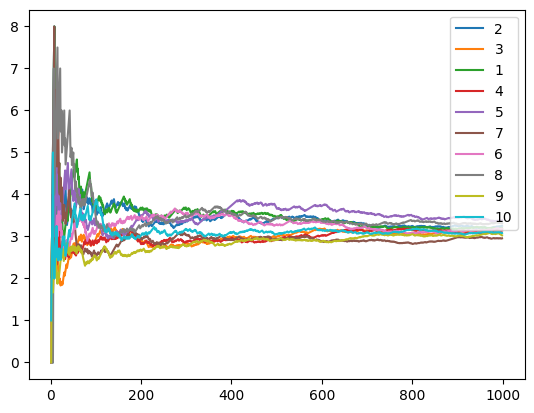

In [39]:
data_dir = './buffon_neddle_data_cumulative'

import os
import matplotlib.pyplot as plt

for file in os.listdir(data_dir):
    df = pd.read_csv(os.path.join(data_dir, file))
    plt.plot(df.number_of_drops, df.pi, label=file.split('_')[-1].split('.')[0])
plt.legend()
plt.show()


array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '10'}>],
       [<Axes: title={'center': '100'}>,
        <Axes: title={'center': '1000'}>],
       [<Axes: title={'center': '10000'}>,
        <Axes: title={'center': '100000'}>]], dtype=object)

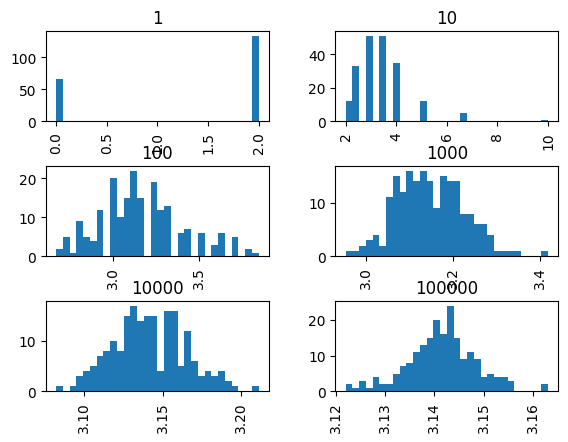

In [140]:
# df['pi'][df['needl']].hist(by=df['number_of_drops'], bins=30)

<Axes: xlabel='number_of_drops', ylabel='pi'>

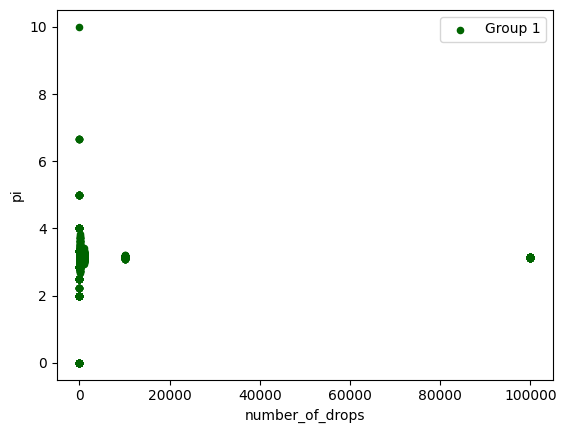

In [141]:
# df.plot.scatter(x="number_of_drops", y="pi", color="DarkGreen", label="Group 1")

pi    Axes(0.125,0.11;0.775x0.77)
dtype: object

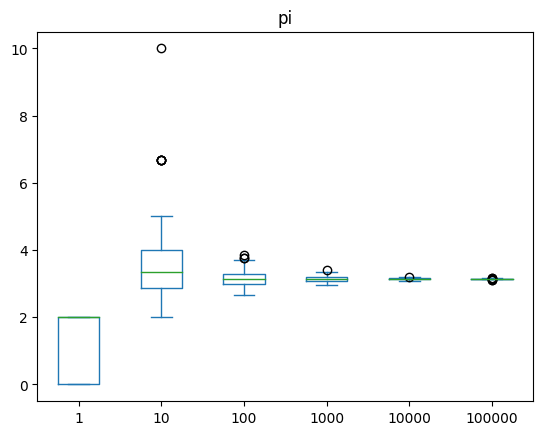

In [142]:
# df.plot.box(by="number_of_drops", column=["pi"], grid=False)

In [143]:
# drop1_buttom = driver.find_element(By.ID, "buffonDrop1")
# drop1_buttom.click()